# UNIVERSIDAD POLITÉCNICA SALESIANA

### Nombre: David Fernando Egas Feijoo

Desarrollo del examen de Inteligencia Artificial y de Sistemas Expertos.

# PROBLEMÁTICA:

La Universidad Politécnica Salesiana, una de las multiples instituciones ecuatorianas golpeadas por la pandemia mundial se ve en la necesidad de buscar nuevas formas de llegar a promocionar la oferta de carreras para el nuevo ciclo lectivo, para ello se pide a los estudiantes de Ingeniería de sistemas crear una aplicación para promocionar diferentes carreras que se ofertan dentro del campus de una forma innovadora, se aplicaran los conocimientos adquiridos en las materias de Sistemas Expertos e Inteligencia Artificial. 

## Desarrollo:

Para resolver la problemática, se plantea realizar una aplicación diseñada en Python, la cual consume servicios de IBM Watson, específicamente 3 los cuales detallaremos a continuación:
- Watson Assistant
- Watson Language Translator
- Watson Speech To Text

La aplicación tendrá un chatbot utilizando Watson Assistant, este bot responderá preguntas acerca de una de las carreras que oferta la universidad, la carrera de Electricidad. Así mismo podrá preguntar acerca del proceso de inscripciones, la malla curricular, el personal docente, los grupos de investigación entre otras opciones más. La siguiente parte que implementará la universidad será para estudiantes extranjeros, ya sea porque son de intercambio o porque vienen a vivir a Ecuador y aún tienen problemas con el idioma español, se implementará un menú donde la persona dirá su pregunta al micrófono en el idioma que domina (en este caso el inglés), la aplicación reconocerá la voz y la convertirá en texto. La última parte tomará este texto capturado y lo usará dentro del último servicio, el servicio de traductor de Watson se devolverá en pantalla una traducción al español de lo que quiso decir la persona, este pasará al chatbot y le devolverá la información que necesita, sin embargo, para esta opción, esta información será traducida para el usuario.

A continuación, se especifica el paso a paso de la construcción de la aplicación.


In [1]:
def conectar():
    
    import json
    from ibm_watson import AssistantV2
    from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

    authenticator = IAMAuthenticator('btzGP76fH90liMxvnZfnimBTPGopc-ym32fZ2XNubGzk')
    assistant = AssistantV2(
        version='2018-09-20',
        authenticator=authenticator)
    assistant.set_service_url('https://api.us-south.assistant.watson.cloud.ibm.com/instances/4211ed26-dba4-4d77-9c62-424fea38972a')
    assistant.set_disable_ssl_verification(False)
    session = assistant.create_session("ee1c54c4-c1d4-4da7-924e-871daf99054a").get_result()
    #print(json.dumps(session, indent=2))
    #print (session['session_id'])
    message = assistant.message(
        "ee1c54c4-c1d4-4da7-924e-871daf99054a",
        session['session_id']).get_result()
    recibir =message.get("output").get("generic")
   
    for dato in recibir:
        if dato["response_type"]=="text":
            enviar=(dato["text"])
    return enviar

In [2]:
import json
from ibm_watson import AssistantV2
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('btzGP76fH90liMxvnZfnimBTPGopc-ym32fZ2XNubGzk')
assistant = AssistantV2(
    version='2018-09-20',
    authenticator=authenticator)
assistant.set_service_url('https://api.us-south.assistant.watson.cloud.ibm.com/instances/4211ed26-dba4-4d77-9c62-424fea38972a')
assistant.set_disable_ssl_verification(False)
session = assistant.create_session("ee1c54c4-c1d4-4da7-924e-871daf99054a").get_result()
print(json.dumps(session, indent=2))
print (session['session_id'])
message = assistant.message(
    "ee1c54c4-c1d4-4da7-924e-871daf99054a",
    session['session_id'],
    input={
        'message_type': 'text',
        'text': 'si'
        
    }).get_result()
print(json.dumps(message, indent=2))


{
  "session_id": "24d89b86-bbc6-4b10-a503-5faabb6cf248"
}
24d89b86-bbc6-4b10-a503-5faabb6cf248
{
  "output": {
    "intents": [
      {
        "intent": "bienvenido",
        "confidence": 1
      }
    ],
    "entities": [
      {
        "entity": "afirmacion",
        "location": [
          0,
          2
        ],
        "value": "si",
        "confidence": 1
      }
    ],
    "generic": [
      {
        "response_type": "text",
        "text": "\u00bfQuieres viajar o movilizarte en la ciudad?"
      }
    ]
  }
}


### Captura de la voz

Esta función capturará la voz de la persona que necesita información ( en inglés ) y la guardará en formato .wap para ser usado en el siguiente método.


In [3]:
def voz():
    import pyaudio
    import wave

    FORMAT = pyaudio.paInt16
    CHANNELS = 2
    RATE = 44100
    CHUNK = 1024
    RECORD_SECONDS = 7
    WAVE_OUTPUT_FILENAME = "C:\\Users\\LENOVO\\Desktop\\Sonidos\\probando.wav"

    audio = pyaudio.PyAudio()

    # start Recording
    stream = audio.open(format=FORMAT, channels=CHANNELS,
                    rate=RATE, input=True,
                    frames_per_buffer=CHUNK)
    print ("recording begins..")
    frames = []

    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)
    print ("finished recording")

    stream.stop_stream()
    stream.close()
    audio.terminate()

    waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    waveFile.setnchannels(CHANNELS)
    waveFile.setsampwidth(audio.get_sample_size(FORMAT))
    waveFile.setframerate(RATE)
    waveFile.writeframes(b''.join(frames))
    waveFile.close()


### Servicio de voz a texto ( speech to text )

La voz que fue capturada en el método anterior será enviada a este método para obtener la información de forma textual y trabajar con esta en el asistente de watson.

In [4]:
def ServicioVozTexto():
    import json
    from os.path import join, dirname
    from ibm_watson import SpeechToTextV1
    from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
    

    authenticator = IAMAuthenticator('RmV-HeURfV0wz8aWUKXRFnbEK3cf50cL2snrISOarrk8')
    speech_to_text = SpeechToTextV1(
        authenticator=authenticator
    )

    speech_to_text.set_service_url('https://api.us-south.speech-to-text.watson.cloud.ibm.com/instances/b8ac70ea-2ca3-4c95-9491-61372dceb144')

    with open(join( "C:\\Users\\LENOVO\\Desktop\\Sonidos\\probando.wav"),
                   'rb') as audio_file:
        speech_recognition_results = speech_to_text.recognize(
            audio=audio_file,
            content_type='audio/wav',
            word_alternatives_threshold=0.9,
            keywords=['colorado', 'tornado', 'tornadoes'],
            keywords_threshold=0.5
        ).get_result()
    #print(json.dumps(speech_recognition_results, indent=2))

    
    jsondecoded = json.loads(json.dumps(speech_recognition_results, indent=2))
    for entity in jsondecoded["results"]:

        for entityProperty in entity["alternatives"]:
            guardar = entityProperty["transcript"]
            #print("Propiedad " + entityProperty["transcript"] )

    print('You said: ' , guardar)
    
    return guardar



### Servicio de traductor ( Watson Language Translate) 

Este servicio traducirá la información obtenida en los métodos anteriores y permitirá enviarlas al asistente de watson para que realice las acciones necesarias y devuelva la información que fue pedida al mismo.

In [5]:
def traductor():
    
    import json
    from ibm_watson import LanguageTranslatorV3
    from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

    authenticator = IAMAuthenticator('mPTAi1x7nomVZyio7UehAGmNwyixR-emINZYxVEzX0k4')
    language_translator = LanguageTranslatorV3(
        version='2018-05-01',
        authenticator=authenticator
    )

    language_translator.set_service_url('https://api.us-south.language-translator.watson.cloud.ibm.com/instances/f9dd3377-792c-4d97-a24d-782386a16f2c')

    translation = language_translator.translate(
        text=ServicioVozTexto(),
        model_id='en-es').get_result()
    #print(json.dumps(translation, indent=2, ensure_ascii=False))
    
    
    traducido = (translation.get("translations"))
    for val in traducido:
        #print(val["translation"])
        datoEnviado = val["translation"]
    print ("Text in spanish:" , datoEnviado)
    return datoEnviado


### Retorno de la información traída por el chatbot

Este método volverá a llamar al servicio de traductor de watson, con el fín de traducir la información que el chatbot devuelva y sea de utilidad para la persona extrangera.

In [6]:
def traductor2(d):
    
    import json
    from ibm_watson import LanguageTranslatorV3
    from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

    authenticator = IAMAuthenticator('mPTAi1x7nomVZyio7UehAGmNwyixR-emINZYxVEzX0k4')
    language_translator = LanguageTranslatorV3(
        version='2018-05-01',
        authenticator=authenticator
    )

    language_translator.set_service_url('https://api.us-south.language-translator.watson.cloud.ibm.com/instances/f9dd3377-792c-4d97-a24d-782386a16f2c')

    translation = language_translator.translate(
        text=d,
        model_id='es-en').get_result()
    #print(json.dumps(translation, indent=2, ensure_ascii=False))
    
    
    traducido = (translation.get("translations"))
    for val in traducido:
        #print(val["translation"])
        datoEnviado = val["translation"]
    print ("Information that you need: " , datoEnviado)
    return datoEnviado



# Implementación del ChatBot con Watson Assistant

El chatbot responderá a algunas preguntas comunes por los usuarios sobre temas como: 

- Inscripciones / Ficha Socio Economica 
- Perfil de egreso
- Malla curricular
- Presentación
- Poder matricularse / inscripciones
- Informacion de los grupos de investigación pertenecientes a la carreras.
- Personal Docente
- Redes sociales
- Vida Estudiantil
- Contactanos
- Varios o información adicional



### Método de autentificación del ChatBot

In [4]:

def autentificar():
    import json
    from ibm_watson import AssistantV2
    from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
    
    authenticator = IAMAuthenticator('btzGP76fH90liMxvnZfnimBTPGopc-ym32fZ2XNubGzk')
    assistant = AssistantV2(
        version='2018-09-20',
        authenticator=authenticator)
    assistant.set_service_url('https://api.us-south.assistant.watson.cloud.ibm.com/instances/4211ed26-dba4-4d77-9c62-424fea38972a')
    assistant.set_disable_ssl_verification(False)
    
    session = assistant.create_session("ee1c54c4-c1d4-4da7-924e-871daf99054a").get_result()
    print(json.dumps(session, indent=2))
    print (session['session_id'])

### Método para enviar mensajes al ChatBot

En esta parte se establecerá la comunicación con el chatbot.

In [5]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt


def mensaje():
    cantidad = input("Soy su asistente, pregunteme lo que necesite saber acerca de la UPS..")
    message = assistant.message(
        "ee1c54c4-c1d4-4da7-924e-871daf99054a",
        session['session_id'],
        input={
            'message_type': 'text',
            'text': cantidad
        
        }).get_result()
    #print(json.dumps(message, indent=2))
    
    valores = (message.get("output").get("generic"))
   
    for dato in valores:
            if dato["response_type"]=="text":
                print(dato["text"])
            
            else:
                response = requests.get(dato["source"])
                img = Image.open(BytesIO(response.content))
                plt.imshow(img)
                plt.axis('off')
                plt.show()
                
                

### Método para realizar la traducción 

Este método realiza la traducción de la información recibida por el chatbot. 

In [15]:
def mensaje2():
    recibir = traductor()
    cantidad = recibir
    message = assistant.message(
        "ee1c54c4-c1d4-4da7-924e-871daf99054a",
        session['session_id'],
        input={
            'message_type': 'text',
            'text': cantidad
        
        }).get_result()
    #print(json.dumps(message, indent=2))
    
    valores = (message.get("output").get("generic"))
    for dato in valores:
        print(dato["text"])
        dato = dato["text"]
        traductor2(dato)    

# Persistencia en la Base de Datos Neo4J

La base de datos se usará para persistir los datos para poder usarlos a futuro como información útil para la Universidad, de esta forma se puede trabajar con los algoritmos que implementa NEO4J.

### Conexón con la base de datos

La conexión es directa con el localhost y sin autenticación.


In [1]:
from neo4j import GraphDatabase

uri="bolt://localhost:7687"
graphDB_Driver=GraphDatabase.driver(uri)

### Limpieza de la base base

Este método se usará en caso de que el usario desee limpiar los datos de la base y dejarla vacía.

In [8]:
#cqlDelete = "MATCH (n) OPTIONAL MATCH (n)-[r]-() DELETE n,r"
#with graphDB_Driver.session() as graphDB_Session:
    #graphDB_Session.run(cqlDelete)

### Creación de nuevos nodos a la base de datos

Aquí se realizará la persistencia de los datos, en una base previamente creaeda, se guardarán el nombre, el apellido y las carreras a las que tiene afinidad.


In [2]:
def crearNodo(nombre, acronimo):
  
    cqlCreate = """MERGE (""" + acronimo +""":Person {name:'""" + nombre +"""'})"""
    
   
    with graphDB_Driver.session() as graphDB_Session:
        graphDB_Session.run(cqlCreate)

In [3]:
def crearRelacion(nombre, carrera1, carrera2):
    
    cqlCreate = """MATCH (a:Person) where a.name='""" + nombre +"""'
                    Match (b:Carrera) where b.name='""" + carrera1 +"""'
                    Match (c:Carrera) where c.name='""" + carrera2 +"""'
                    MERGE (a)-[:LIKES]->(b)
                    MERGE (a)-[:LIKES]->(c)"""
    
   
    with graphDB_Driver.session() as graphDB_Session:
        graphDB_Session.run(cqlCreate)


### Listado de los datos de la base de datos

En esta parte se visualizarán los datos de los usuarios en la base.

In [5]:
cqlNodeQuery = "Match (n) return n"
with graphDB_Driver.session() as graphDB_Session:
    nodes = graphDB_Session.run(cqlNodeQuery)
    for nodo in nodes:
        print(nodo)

<Record n=<Node id=0 labels=frozenset({'Carrera'}) properties={'name': 'Derecho'}>>
<Record n=<Node id=1 labels=frozenset({'Carrera'}) properties={'name': 'Literatura'}>>
<Record n=<Node id=2 labels=frozenset({'Carrera'}) properties={'name': 'Artes'}>>
<Record n=<Node id=3 labels=frozenset({'Carrera'}) properties={'name': 'Cultura Físca'}>>
<Record n=<Node id=4 labels=frozenset({'Carrera'}) properties={'name': 'Administración'}>>
<Record n=<Node id=5 labels=frozenset({'Carrera'}) properties={'name': 'Psicología'}>>
<Record n=<Node id=6 labels=frozenset({'Person'}) properties={'name': 'David'}>>
<Record n=<Node id=7 labels=frozenset({'Person'}) properties={'name': 'Cristian'}>>
<Record n=<Node id=8 labels=frozenset({'Person'}) properties={'name': 'Joss'}>>
<Record n=<Node id=9 labels=frozenset({'Person'}) properties={'name': 'Bryan'}>>
<Record n=<Node id=10 labels=frozenset({'Person'}) properties={'name': 'Leandro'}>>
<Record n=<Node id=11 labels=frozenset({'Materias'}) properties={'tit

# Entrenamiento ANN para los datos

El objetivo del entrenamiento ANN, es para ayudar al usuario a tener más opciones de carreras que podría seguir según sus gustos, por ejemplo: un estudiante quiere preguntar sobre la carrera de Electricidad, nuestro asistente al finalizar le hará unas pequeñas preguntas como: ¿qué otra carrera te gustaría seguir aparte de esta?, entonces la consulta en NEO4J le mostrará otras posibles carreras afines a las que ya eligió el usuario como recomendación, estas recomendaciones se basan en las materias que están por detrás en cada carrera, es decir, tenemos materias que pueden estar en ingeniería como también en derecho o administración, se hace una comparativa y se le recomienda.

### Entrenamiento

In [4]:
def entrenamiento1():
    cqlNodeQuery = """MATCH (p:Person)-[:LIKES]->(Carrera)
     WITH {item:id(p), categories: collect(id(Carrera))} AS userData
     WITH collect(userData) AS data
     CALL gds.alpha.ml.ann.stream({
       nodeProjection: '*',
       relationshipProjection: '*',
       data: data,
       algorithm: 'jaccard',
       similarityCutoff: 0.1,
       concurrency: 1
     })
     YIELD item1, item2, similarity
     return gds.util.asNode(item1).name AS from, gds.util.asNode(item2).name AS to, similarity
     ORDER BY from"""
    with graphDB_Driver.session() as graphDB_Session:
        graphDB_Session.run(cqlNodeQuery)



In [5]:
def entrenamiento2():
    cqlNodeQuery = """
    MATCH (p:Person)-[:LIKES]->(Carrera)
     WITH {item:id(p), categories: collect(id(Carrera))} AS userData
     WITH collect(userData) AS data
     CALL gds.alpha.ml.ann.write({
      nodeProjection: '*',
      relationshipProjection: '*',
      algorithm: 'jaccard',
      data: data,
      similarityCutoff: 0.1,
      showComputations: true,
      concurrency: 1
     })
     YIELD nodes, similarityPairs, writeRelationshipType, writeProperty, min, max, mean, p95
     RETURN nodes, similarityPairs, writeRelationshipType, writeProperty, min, max, mean, p95"""
    with graphDB_Driver.session() as graphDB_Session:
        graphDB_Session.run(cqlNodeQuery)

In [6]:
def carrerasAfines(nombre):
    cqlNodeQuery = """MATCH (p:Person {name:'""" + nombre +"""'})-[:SIMILAR]->(other),
    (other)-[:LIKES]->(Carrera)
     WHERE not((p)-[:lIKES]->(Carrera))
     RETURN Carrera.name AS Carreras , count(*) AS Afinidad
     ORDER BY Afinidad DESC"""
    with graphDB_Driver.session() as graphDB_Session:
        nodes = graphDB_Session.run(cqlNodeQuery)
        for nodo in nodes:
            print(nodo)






In [7]:
def testeo():
   
    print("Diganos su nombre y apellido:")
    datospersonales = input("Digite: ")
    acronimo = (datospersonales.replace(" ", "")).lower()
    
    
    
    
    print("Diganos 2 carreras aparte de la que quiere, que le llaman la atención.")
    carrera1 = input("Carrera 1: ")
    carrera2 = input("Carrera 2: ")
    print("")
    
   
    #crearNodo(datospersonales,acronimo)
    #crearRelacion(datospersonales, carrera1, carrera2)
    entrenamiento1()
    entrenamiento2()
    print("Le recomendamos tener en cuenta estas otras opciones de carreras, las cuales encajan con sus elecciones de carrera:")
    
    datos = carrerasAfines(datospersonales)
    for d in datos:
        print(d["Carreras"])
    
 

### Interfaz gráfica de la aplicación

Esta interfaz esta diseñada en PyQt5, es sencilla e intiutiva para el usuario, desde ella podrá acceder a los 3 servicios que brindamos y llamar a nuestra página en fb, donde podrá interactuar con el bot usando solo el servicio de chat.

In [ ]:
from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtGui import QPixmap,QIcon
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import urllib
import webbrowser



class Ui_MainWindow(object):
    def carrerasAfines(self,nombre):
        print("entro")
        cqlNodeQuery = """MATCH (p:Person {name:'""" + nombre +"""'})-[:SIMILAR]->(other),
        (other)-[:LIKES]->(Carrera)
         WHERE not((p)-[:lIKES]->(Carrera))
         RETURN Carrera.name AS Carreras , count(*) AS Afinidad
         ORDER BY Afinidad DESC"""
        with graphDB_Driver.session() as graphDB_Session:
            nodes = graphDB_Session.run(cqlNodeQuery)
            for nodo in nodes:
                aux= str(nodo).replace("<","")
                aux2= aux.replace(">","")
                self.textBrowser.append(aux2) 
                
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(1128, 655)
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.label = QtWidgets.QLabel(self.centralwidget)
        self.label.setGeometry(QtCore.QRect(0, 0, 1121, 611))
        self.label.setText("")
        self.label.setPixmap(QtGui.QPixmap("fondo-claro.jpg"))
        self.label.setObjectName("label")
        self.label_3 = QtWidgets.QLabel(self.centralwidget)
        self.label_3.setGeometry(QtCore.QRect(40, 170, 231, 21))
        font = QtGui.QFont()
        font.setFamily("Segoe Script")
        font.setPointSize(12)
        self.label_3.setFont(font)
        self.label_3.setStyleSheet("color: rgb(255, 255, 255);\n"
"color: rgb(0, 0, 0);")
        self.label_3.setObjectName("label_3")
        self.lineEdit = QtWidgets.QLineEdit(self.centralwidget)
        self.lineEdit.setGeometry(QtCore.QRect(20, 520, 241, 31))
        self.lineEdit.setObjectName("lineEdit")
        self.textBrowser = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser.setGeometry(QtCore.QRect(330, 290, 361, 281))
        self.textBrowser.setObjectName("textBrowser")
        self.pushButton_2 = QtWidgets.QPushButton(self.centralwidget)
        self.pushButton_2.setGeometry(QtCore.QRect(30, 210, 241, 41))
        font = QtGui.QFont()
        font.setFamily("Segoe Script")
        self.pushButton_2.setFont(font)
        self.pushButton_2.setCursor(QtGui.QCursor(QtCore.Qt.PointingHandCursor))
        self.pushButton_2.setWhatsThis("")
        self.pushButton_2.setStyleSheet("background-color: rgb(233, 255, 235);\n"
"border: 1.5px solid rgb(61, 83, 54);\n"
"")
        icon = QtGui.QIcon()
        icon.addPixmap(QtGui.QPixmap("cuadrado.png"), QtGui.QIcon.Normal, QtGui.QIcon.On)
        self.pushButton_2.setIcon(icon)
        self.pushButton_2.setDefault(False)
        self.pushButton_2.setFlat(False)
        self.pushButton_2.setObjectName("pushButton_2")
        self.pushButton_3 = QtWidgets.QPushButton(self.centralwidget)
        self.pushButton_3.setGeometry(QtCore.QRect(310, 210, 241, 41))
        font = QtGui.QFont()
        font.setFamily("Segoe Script")
        self.pushButton_3.setFont(font)
        self.pushButton_3.setCursor(QtGui.QCursor(QtCore.Qt.PointingHandCursor))
        self.pushButton_3.setWhatsThis("")
        self.pushButton_3.setStyleSheet("background-color: rgb(233, 255, 235);\n"
"border: 1.5px solid rgb(61, 83, 54);\n"
"")
        self.pushButton_3.setIcon(icon)
        self.pushButton_3.setDefault(False)
        self.pushButton_3.setFlat(False)
        self.pushButton_3.setObjectName("pushButton_3")
        self.pushButton_4 = QtWidgets.QPushButton(self.centralwidget)
        self.pushButton_4.setGeometry(QtCore.QRect(590, 210, 241, 41))
        font = QtGui.QFont()
        font.setFamily("Segoe Script")
        self.pushButton_4.setFont(font)
        self.pushButton_4.setCursor(QtGui.QCursor(QtCore.Qt.PointingHandCursor))
        self.pushButton_4.setWhatsThis("")
        self.pushButton_4.setStyleSheet("background-color: rgb(233, 255, 235);\n"
"border: 1.5px solid rgb(61, 83, 54);\n"
"button->setStyleSheet(\"Text-align:left\");\n"
"")
        self.pushButton_4.setIcon(icon)
        self.pushButton_4.setDefault(False)
        self.pushButton_4.setFlat(False)
        self.pushButton_4.setObjectName("pushButton_4")
        self.pushButton_5 = QtWidgets.QPushButton(self.centralwidget)
        self.pushButton_5.setGeometry(QtCore.QRect(870, 210, 221, 41))
        font = QtGui.QFont()
        font.setFamily("Segoe Script")
        self.pushButton_5.setFont(font)
        self.pushButton_5.setCursor(QtGui.QCursor(QtCore.Qt.PointingHandCursor))
        self.pushButton_5.setWhatsThis("")
        self.pushButton_5.setStyleSheet("background-color: rgb(233, 255, 235);\n"
"border: 1.5px solid rgb(61, 83, 54);\n"
"")
        self.pushButton_5.setIcon(icon)
        self.pushButton_5.setDefault(False)
        self.pushButton_5.setFlat(False)
        self.pushButton_5.setObjectName("pushButton_5")
        self.label_4 = QtWidgets.QLabel(self.centralwidget)
        self.label_4.setGeometry(QtCore.QRect(20, 470, 281, 41))
        font = QtGui.QFont()
        font.setFamily("Segoe Script")
        font.setPointSize(10)
        self.label_4.setFont(font)
        self.label_4.setStyleSheet("color: rgb(255, 255, 255);\n"
"color: rgb(0, 0, 0);")
        self.label_4.setObjectName("label_4")
        self.label_2 = QtWidgets.QLabel(self.centralwidget)
        self.label_2.setGeometry(QtCore.QRect(220, 10, 561, 181))
        self.label_2.setText("")
        self.label_2.setPixmap(QtGui.QPixmap("LOGO.png"))
        self.label_2.setObjectName("label_2")
        self.label_5 = QtWidgets.QLabel(self.centralwidget)
        self.label_5.setGeometry(QtCore.QRect(120, 300, 111, 171))
        self.label_5.setText("")
        self.label_5.setPixmap(QtGui.QPixmap("robot.png"))
        self.label_5.setObjectName("label_5")
        self.label_6 = QtWidgets.QLabel(self.centralwidget)
        self.label_6.setGeometry(QtCore.QRect(720, 290, 311, 281))
        self.label_6.setText("")
        self.label_6.setObjectName("label_6")
        self.lineEdit_2 = QtWidgets.QLineEdit(self.centralwidget)
        self.lineEdit_2.setGeometry(QtCore.QRect(740, 360, 241, 31))
        self.lineEdit_2.setObjectName("lineEdit_2")
        self.lineEdit_3 = QtWidgets.QLineEdit(self.centralwidget)
        self.lineEdit_3.setGeometry(QtCore.QRect(740, 440, 241, 31))
        self.lineEdit_3.setObjectName("lineEdit_3")
        self.lineEdit_4 = QtWidgets.QLineEdit(self.centralwidget)
        self.lineEdit_4.setGeometry(QtCore.QRect(740, 520, 241, 31))
        self.lineEdit_4.setObjectName("lineEdit_4")
        self.label_7 = QtWidgets.QLabel(self.centralwidget)
        self.label_7.setGeometry(QtCore.QRect(750, 320, 281, 41))
        font = QtGui.QFont()
        font.setFamily("Segoe Script")
        font.setPointSize(10)
        self.label_7.setFont(font)
        self.label_7.setStyleSheet("color: rgb(255, 255, 255);\n"
"color: rgb(0, 0, 0);")
        self.label_7.setObjectName("label_7")
        self.label_8 = QtWidgets.QLabel(self.centralwidget)
        self.label_8.setGeometry(QtCore.QRect(740, 400, 281, 41))
        font = QtGui.QFont()
        font.setFamily("Segoe Script")
        font.setPointSize(10)
        self.label_8.setFont(font)
        self.label_8.setStyleSheet("color: rgb(255, 255, 255);\n"
"color: rgb(0, 0, 0);")
        self.label_8.setObjectName("label_8")
        self.label_9 = QtWidgets.QLabel(self.centralwidget)
        self.label_9.setGeometry(QtCore.QRect(740, 480, 281, 41))
        font = QtGui.QFont()
        font.setFamily("Segoe Script")
        font.setPointSize(10)
        self.label_9.setFont(font)
        self.label_9.setStyleSheet("color: rgb(255, 255, 255);\n"
"color: rgb(0, 0, 0);")
        self.label_9.setObjectName("label_9")
        MainWindow.setCentralWidget(self.centralwidget)
        self.menubar = QtWidgets.QMenuBar(MainWindow)
        self.menubar.setGeometry(QtCore.QRect(0, 0, 1128, 26))
        self.menubar.setObjectName("menubar")
        MainWindow.setMenuBar(self.menubar)
        self.statusbar = QtWidgets.QStatusBar(MainWindow)
        self.statusbar.setObjectName("statusbar")
        MainWindow.setStatusBar(self.statusbar)

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)
        
    def mensaje(self):
        
        self.lineEdit.setVisible(True)

        self.label_4.setText("Soy tu asistente, pregúnteme!")
        cantidad=self.lineEdit.text()
        if cantidad != None:
            message = assistant.message(
                "ee1c54c4-c1d4-4da7-924e-871daf99054a",
                session['session_id'],
                input={
                    'message_type': 'text',
                    'text': cantidad

                }).get_result()
            #print(json.dumps(message, indent=2))

            valores = (message.get("output").get("generic"))

            for dato in valores:
                    if dato["response_type"]=="text":
                        self.textBrowser.setText(dato["text"])

                    else:
                        data = urllib.request.urlopen(dato["source"]).read()
                        pixmap = QPixmap()
                        pixmap.loadFromData(data)
                        pixmap_resized = pixmap.scaled(291, 271, QtCore.Qt.KeepAspectRatio)
                        self.label_6.setPixmap(pixmap_resized)
            
            
    
    def mensaje2(self):
        voz()
        recibir = traductor()
        cantidad = recibir
        message = assistant.message(
            "ee1c54c4-c1d4-4da7-924e-871daf99054a",
            session['session_id'],
            input={
                'message_type': 'text',
                'text': cantidad

            }).get_result()
        #print(json.dumps(message, indent=2))

        valores = (message.get("output").get("generic"))
        for dato in valores:
            if dato["response_type"]=="text":
                self.textBrowser.setText(dato["text"])
            else:
                data = urllib.request.urlopen(dato["source"]).read()
                pixmap = QPixmap()
                pixmap.loadFromData(data)
                pixmap_resized = pixmap.scaled(291, 271, QtCore.Qt.KeepAspectRatio)
                self.label_6.setPixmap(pixmap_resized)
                
    
                
                
    
    def testeo(self):
       
        print("Diganos su nombre y apellido:")
        self.label_7.setText("Diganos su nombre y apellido:")
        nombre = self.lineEdit_2.text()
        acronimo = (nombre.replace(" ", "")).lower()
        print(acronimo)




        self.label_8.setText("1ra Carrera que le guste")
        carrera1 = self.lineEdit_3.text()
        print(carrera1)
        
        self.label_9.setText("2da Carrera que le guste")
        carrera2 = self.lineEdit_4.text()
        print(carrera2)


        crearNodo(nombre,acronimo)
        crearRelacion(nombre, carrera1, carrera2)
        entrenamiento1()
        entrenamiento2()
        self.carrerasAfines(nombre)
        
       
        
    def metodo_boton4(self):
                    
        self.lineEdit_2.setVisible(True)
        self.lineEdit_3.setVisible(True)
        self.lineEdit_4.setVisible(True)
        self.label_6.setVisible(False)
        self.label_7.setVisible(True)
        self.label_8.setVisible(True)
        self.label_9.setVisible(True)
    
    def urlU(self):
        self.textBrowser.append("Puede visitar nuestra página oficial en FaceBook y nuestro ChatBot lo atenderá!!!")
       
       
        webbrowser.open('https://www.facebook.com/ChatBot-Ups-100656585082876/?modal=admin_todo_tour')
    
    def link(self, linkStr):

        QDesktopServices.openUrl(QUrl(linkStr))

    
    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "MainWindow"))
        self.label_3.setText(_translate("MainWindow", "ESCOJA SU OPCIÓN:"))
        self.pushButton_2.setToolTip(_translate("MainWindow", "<html><head/><body><p><span style=\" color:#ffffff;\">sdfsfsdfsd</span></p></body></html>"))
        self.pushButton_2.setText(_translate("MainWindow", "RECIBIR INFORMACIÓN"))
        self.pushButton_3.setToolTip(_translate("MainWindow", "<html><head/><body><p><span style=\" color:#ffffff;\">sdfsfsdfsd</span></p></body></html>"))
        self.pushButton_3.setText(_translate("MainWindow", "YOU DON´T SPEAK SPANISH?"))
        self.pushButton_4.setToolTip(_translate("MainWindow", "<html><head/><body><p><span style=\" color:#ffffff;\">sdfsfsdfsd</span></p></body></html>"))
        self.pushButton_4.setText(_translate("MainWindow", "TEST"))
        self.pushButton_5.setToolTip(_translate("MainWindow", "<html><head/><body><p><span style=\" color:#ffffff;\">sdfsfsdfsd</span></p></body></html>"))
        self.pushButton_5.setText(_translate("MainWindow", "PÁGINA OFICIAL"))
        self.label_4.setText(_translate("MainWindow", "¿Qué información necesita?"))
        self.label_7.setText(_translate("MainWindow", "Nombres y Apellidos:"))
        self.label_8.setText(_translate("MainWindow", "Primera Carrera"))
        self.label_9.setText(_translate("MainWindow", "Segunda Carrera"))
        
        self.lineEdit.returnPressed.connect(self.pushButton_2.click)
        self.lineEdit.setVisible(False)
        self.pushButton_2.clicked.connect(self.mensaje)
        self.pushButton_3.clicked.connect(self.mensaje2)
        self.pushButton_4.clicked.connect(self.metodo_boton4)
        self.pushButton_5.clicked.connect(self.urlU) 
       
        
        
        
        self.lineEdit_2.setVisible(False)
        self.lineEdit_3.setVisible(False)
        self.lineEdit_4.setVisible(False)
        self.label_7.setVisible(False)
        self.label_8.setVisible(False)
        self.label_9.setVisible(False)
        self.lineEdit_4.returnPressed.connect(self.testeo)
    
if __name__ == "__main__":
    import sys
    app = QtWidgets.QApplication(sys.argv)
    MainWindow = QtWidgets.QMainWindow()
    ui = Ui_MainWindow()
    ui.setupUi(MainWindow)
    MainWindow.show()
    sys.exit(app.exec_())


# Interfaz Gráfica

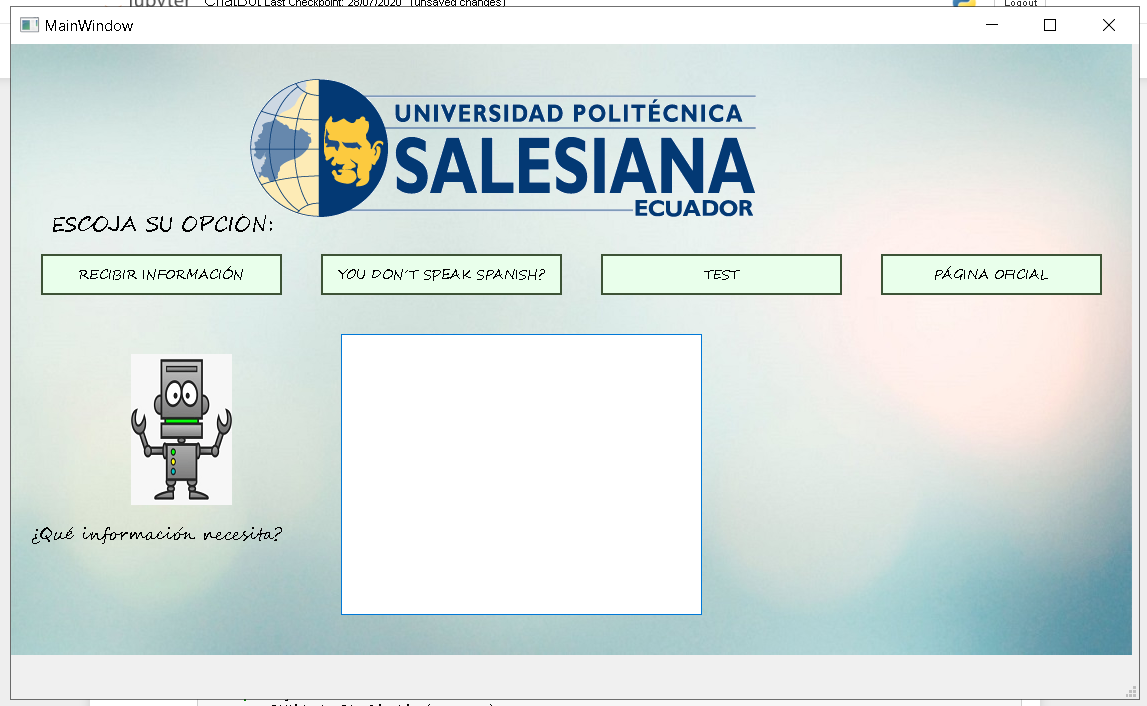

# Messenger
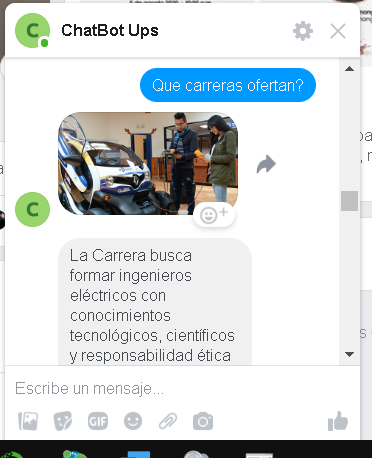



In [ ]:
def capturardatos():
    
    

In [7]:
# -*- coding: utf-8 -*-

# Form implementation generated from reading ui file 'proyecto.ui'
#
# Created by: PyQt5 UI code generator 5.15.0
#
# WARNING: Any manual changes made to this file will be lost when pyuic5 is
# run again.  Do not edit this file unless you know what you are doing.


from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtGui import QPixmap,QIcon
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import urllib
import webbrowser



class Ui_MainWindow(object):
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(1128, 655)
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.label = QtWidgets.QLabel(self.centralwidget)
        self.label.setGeometry(QtCore.QRect(0, 0, 1121, 611))
        self.label.setText("")
        self.label.setPixmap(QtGui.QPixmap("fondo-claro.jpg"))
        self.label.setObjectName("label")
        self.label_3 = QtWidgets.QLabel(self.centralwidget)
        self.label_3.setGeometry(QtCore.QRect(30, 190, 291, 21))
        font = QtGui.QFont()
        font.setFamily("Segoe Script")
        font.setPointSize(12)
        self.label_3.setFont(font)
        self.label_3.setStyleSheet("color: rgb(255, 255, 255);\n"
"color: rgb(0, 0, 0);")
        self.label_3.setObjectName("label_3")
        self.lineEdit = QtWidgets.QLineEdit(self.centralwidget)
        self.lineEdit.setGeometry(QtCore.QRect(10, 450, 241, 31))
        self.lineEdit.setObjectName("lineEdit")
        self.textBrowser = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser.setGeometry(QtCore.QRect(300, 260, 361, 181))
        self.textBrowser.setObjectName("textBrowser")
        self.pushButton_3 = QtWidgets.QPushButton(self.centralwidget)
        self.pushButton_3.setGeometry(QtCore.QRect(870, 550, 241, 41))
        font = QtGui.QFont()
        font.setFamily("Segoe Script")
        self.pushButton_3.setFont(font)
        self.pushButton_3.setCursor(QtGui.QCursor(QtCore.Qt.PointingHandCursor))
        self.pushButton_3.setWhatsThis("")
        self.pushButton_3.setStyleSheet("background-color: rgb(233, 255, 235);\n"
"border: 1.5px solid rgb(61, 83, 54);\n"
"")
        icon = QtGui.QIcon()
        icon.addPixmap(QtGui.QPixmap("cuadrado.png"), QtGui.QIcon.Normal, QtGui.QIcon.On)
        self.pushButton_3.setIcon(icon)
        self.pushButton_3.setDefault(False)
        self.pushButton_3.setFlat(False)
        self.pushButton_3.setObjectName("pushButton_3")
        self.label_4 = QtWidgets.QLabel(self.centralwidget)
        self.label_4.setGeometry(QtCore.QRect(10, 230, 281, 41))
        font = QtGui.QFont()
        font.setFamily("Segoe Script")
        font.setPointSize(10)
        self.label_4.setFont(font)
        self.label_4.setStyleSheet("color: rgb(255, 255, 255);\n"
"color: rgb(0, 0, 0);")
        self.label_4.setObjectName("label_4")
        self.label_2 = QtWidgets.QLabel(self.centralwidget)
        self.label_2.setGeometry(QtCore.QRect(290, 0, 551, 181))
        self.label_2.setText("")
        self.label_2.setPixmap(QtGui.QPixmap("LOGO.png"))
        self.label_2.setObjectName("label_2")
        self.label_5 = QtWidgets.QLabel(self.centralwidget)
        self.label_5.setGeometry(QtCore.QRect(70, 270, 101, 171))
        self.label_5.setText("")
        self.label_5.setPixmap(QtGui.QPixmap("robot.png"))
        self.label_5.setObjectName("label_5")
        self.label_6 = QtWidgets.QLabel(self.centralwidget)
        self.label_6.setGeometry(QtCore.QRect(720, 290, 311, 281))
        self.label_6.setText("")
        self.label_6.setObjectName("label_6")
        MainWindow.setCentralWidget(self.centralwidget)
        self.menubar = QtWidgets.QMenuBar(MainWindow)
        self.menubar.setGeometry(QtCore.QRect(0, 0, 1128, 26))
        self.menubar.setObjectName("menubar")
        MainWindow.setMenuBar(self.menubar)
        self.statusbar = QtWidgets.QStatusBar(MainWindow)
        self.statusbar.setObjectName("statusbar")
        MainWindow.setStatusBar(self.statusbar)

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)
        
    def conection(self):
        recibir =conectar()
        self.label_4.setText(recibir)
        
    
        
    def mensaje(self):
        self.lineEdit.setVisible(True)
        cantidad=self.lineEdit.text()
        if cantidad != None:
            
            message = assistant.message(
                "ee1c54c4-c1d4-4da7-924e-871daf99054a",
                session['session_id'],
                input={
                    'message_type': 'text',
                    'text': cantidad

                }).get_result()
            #print(json.dumps(message, indent=2))

            valores = (message.get("output").get("generic"))

            for dato in valores:
                    if dato["response_type"]=="text":
                        self.label_4.setText(dato["text"])

                    else:
                        data = urllib.request.urlopen(dato["source"]).read()
                        pixmap = QPixmap()
                        pixmap.loadFromData(data)
                        pixmap_resized = pixmap.scaled(291, 271, QtCore.Qt.KeepAspectRatio)
                        self.label_6.setPixmap(pixmap_resized)
                        
            text = dato["text"];
            list=[]
            if text == "Te  recomendaremos un auto para ti":
                 print("se acabo")
            else:
                list.append(text)
            
            for valores in list:
                print(valores[2])
               
                

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "MainWindow"))
        self.label_3.setText(_translate("MainWindow", ""))
        self.pushButton_3.setToolTip(_translate("MainWindow", "<html><head/><body><p><span style=\" color:#ffffff;\">sdfsfsdfsd</span></p></body></html>"))
        self.pushButton_3.setText(_translate("MainWindow", "OTRAS OPCIONES:"))
        self.label_4.setText(_translate("MainWindow", ""))
        self.lineEdit.returnPressed.connect(self.mensaje)
        self.conection()
        

if __name__ == "__main__":
    import sys
    
    app = QtWidgets.QApplication(sys.argv)
    MainWindow = QtWidgets.QMainWindow()
    ui = Ui_MainWindow()
    ui.setupUi(MainWindow)
    MainWindow.show()
    sys.exit(app.exec_())

u


SystemExit: 0

C:\Users\LENOVO\anaconda3\envs\ibmWatson\lib\site-packages\IPython\core\interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
